# Explore medal statistics in the Summer Olympics

In this project, we will explore the historical medal statistics of the Summer Olympics. The medal data was obtained from [The Guardian](https://www.theguardian.com/sport/datablog/2012/jun/25/olympic-medal-winner-list-data#data). It comprises records of all events held at the Olympic games between 1896 and 2008.

## 1. Read and inspect data

In [43]:
# Import pandas
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Read csv file into a DataFrame: medals
medals = pd.read_csv('all_medalists.csv')

# Print first 5 rows of medals for speculation
medals.head()

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
0,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold
1,Athens,1896,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100m freestyle,M,Silver
2,Athens,1896,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100m freestyle for sailors,M,Bronze
3,Athens,1896,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100m freestyle for sailors,M,Gold
4,Athens,1896,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100m freestyle for sailors,M,Silver


In [44]:
# Get the information of 'medals'
medals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29216 entries, 0 to 29215
Data columns (total 10 columns):
City            29216 non-null object
Edition         29216 non-null int64
Sport           29216 non-null object
Discipline      29216 non-null object
Athlete         29216 non-null object
NOC             29216 non-null object
Gender          29216 non-null object
Event           29216 non-null object
Event_gender    29216 non-null object
Medal           29216 non-null object
dtypes: int64(1), object(9)
memory usage: 2.2+ MB


Note that there is no missing data! We can go straightly to the analysis. 

## 2. Get the total number of medals awarded to USA

To get the total number of medals awarded to the USA, we need to filter the 'USA' rows, group the 'medals' DataFrame by 'Edition,' and count the number of medals per edition.

In [45]:
# 1. Filter the 'USA' rows and use the groupby() function to put the 'Edition' column on the index: USA_edition_grouped
USA_edition_grouped = medals.loc[medals.NOC == 'USA'].groupby('Edition')

# 2. Select the 'Medal' column and use the aggregation method, count(), to get final result
USA_edition_grouped['Medal'].count()

Edition
1896     20
1900     55
1904    394
1908     63
1912    101
1920    193
1924    198
1928     84
1932    181
1936     92
1948    148
1952    130
1956    118
1960    112
1964    150
1968    149
1972    155
1976    155
1984    333
1988    193
1992    224
1996    260
2000    248
2004    264
2008    315
Name: Medal, dtype: int64

## 3. Rank the top 10 countries by total number of medals

In [46]:
# 1. Select the 'NOC' column of medals: country_names
country_names = medals['NOC']

# 2. Count the number of medals won by each country: medal_counts
medal_counts = country_names.value_counts()

# 3. Print top 10 countries ranked by medals
medal_counts.head(10)

USA    4335
URS    2049
GBR    1594
FRA    1314
ITA    1228
GER    1211
AUS    1075
HUN    1053
SWE    1021
GDR     825
Name: NOC, dtype: int64

As expected, USA takes the first place, followed by URS (Soviet Union), GBR (Great Britain), FRA (France), and ITA (Italy). 

## 4. Compute the number of separate bronze, silver, and gold medals each country won

In [47]:
# 1. Construct the pivot table: counted
counted = medals.pivot_table(index='NOC', columns='Medal', values='Athlete', aggfunc='count')

# 2. Create the new column: counted['totals']
counted['totals'] = counted.sum(axis='columns')

# 3. Sort counted by the 'totals' column
counted = counted.sort_values('totals', ascending=False)

# 4. Print the top 10 rows of counted
counted.head(10)

Medal,Bronze,Gold,Silver,totals
NOC,,,,
USA,1052.0,2088.0,1195.0,4335.0
URS,584.0,838.0,627.0,2049.0
GBR,505.0,498.0,591.0,1594.0
FRA,475.0,378.0,461.0,1314.0
ITA,374.0,460.0,394.0,1228.0
GER,454.0,407.0,350.0,1211.0
AUS,413.0,293.0,369.0,1075.0
HUN,345.0,400.0,308.0,1053.0
SWE,325.0,347.0,349.0,1021.0


USA won the most bronze, silver, and gold medals.

## 5. Find the false data

Did you notice 2 columns related to gender in the 'medals' DataFrame? What is the difference between 'Event_gender' and 'Gender?' 'Event_gender' is, as the name implies, the event for a specific gender. Could there be a chance for a man to win a medal in a woman event? Let's find out!
<br>
<br>
In particular, we should not see something like (Event_gender='M', Gender='Women') or (Event_gender='W', Gender='Men').

In [48]:
# Select the 2 columns: ev_gen
ev_gen = medals[['Event_gender', 'Gender']]

# Print the first 5 rows for speculation
ev_gen.head()

,Event_gender,Gender
0,M,Men
1,M,Men
2,M,Men
3,M,Men
4,M,Men


Let's get the unique 'Event-gender'-'Gender' pairs. 

In [49]:
# Drop duplicate pairs: ev_gen_uniques
ev_gen_uniques = ev_gen.drop_duplicates()

# Print ev_gen_uniques
ev_gen_uniques

,Event_gender,Gender
0,M,Men
348,X,Men
416,W,Women
639,X,Women
23675,W,Men


Note that last pair, which has (Event_gender='W', Gender='Men'), in row 23675.

In [50]:
# Group medals by the two columns: medals_by_gender
medals_by_gender = medals.groupby(['Event_gender', 'Gender'])

# Create a DataFrame with a group count: medal_count_by_gender
medal_count_by_gender = pd.DataFrame(medals_by_gender.count())

# Print medal_count_by_gender
medal_count_by_gender

City  Edition  Sport  Discipline  Athlete    NOC  Event  \
Event_gender Gender                                                             
M            Men     20067    20067  20067       20067    20067  20067  20067   
W            Men         1        1      1           1        1      1      1   
             Women    7277     7277   7277        7277     7277   7277   7277   
X            Men      1653     1653   1653        1653     1653   1653   1653   
             Women     218      218    218         218      218    218    218   

                     Medal  
Event_gender Gender         
M            Men     20067  
W            Men         1  
             Women    7277  
X            Men      1653  
             Women     218

There is one suspicious row, the second row, where (Event_gender='W', Gender='Men'). All feature columns have a value equal to '1', meaning only one suspicious row.
<br>
<br>
Now, let's find out who was the man that won a woman event, and what that event was, by locating the suspicious row in the original DataFrame, 'medals.'

In [51]:
# Create the Boolean Series: sus
sus = (medals.Event_gender == 'W') & (medals.Gender == 'Men')

# Create a DataFrame with the suspicious row: suspect
suspect = pd.DataFrame(medals[sus])

# Print suspect
suspect

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
23675,Sydney,2000,Athletics,Athletics,"CHEPCHUMBA, Joyce",KEN,Men,marathon,W,Bronze


Joyce Chepchumba from Kenya was the man that won a bronze medal in the marathon in the 2000 Sydney Olympics. However, if you search Joyce Chepchumba, you will find out Joyce is actually a woman. That is a data error, likely from manual data entry.

## 6. Find medals won in the most distinct sports

Let's start off by first finding out the total number of distinct sports in the Olympics.

In [52]:
# Find out how many distinct sports total
medals['Sport'].nunique()

42

There are 42 distinct sports.

In [53]:
# Group medals by country 'NOC': country_grouped
country_grouped = medals.groupby(['NOC'])

# Compute the number of distinct sports in which each country won medals: num_sports
num_sports = country_grouped['Sport'].nunique()

# Sort the values of Nsports in descending order
num_sports = num_sports.sort_values(ascending=False)

# Print the top 10 rows of Nsports
num_sports.head(10)

NOC
USA    34
GBR    31
FRA    28
GER    26
CHN    24
AUS    22
ESP    22
CAN    22
SWE    21
URS    21
Name: Sport, dtype: int64

Interestingly, USA continues to remain on the top of the list. USA won medals in 34 distinct sports!

## 7. Visualize medals

### 7.1 Visualize USA medal counts by edition using a line plot

Text(0,0.5,'Counts')

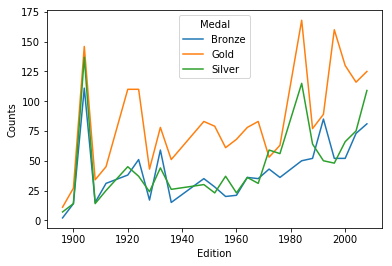

In [54]:
# Create the DataFrame: usa
usa = medals[medals.NOC == 'USA']

# Group usa by ['Edition', 'Medal'] and aggregate over 'Athlete'
usa_medals_by_year = usa.groupby(['Edition', 'Medal'])['Athlete'].count()

# Reshape usa_medals_by_year by unstacking
usa_medals_by_year = usa_medals_by_year.unstack(level='Medal')

# Plot the DataFrame usa_medals_by_year
usa_medals_by_year.plot()
plt.ylabel('Counts')

USA won most medals in gold.

### 7.2 Visualize USA medal counts by edition using an area plot

Text(0,0.5,'Total counts')

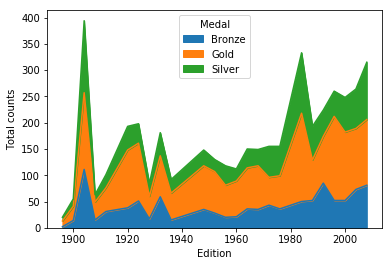

In [55]:
# Create an area plot of usa_medals_by_year
usa_medals_by_year.plot.area()
plt.ylabel('Total counts')

Notice that the medals are ordered according to a lexicographic (dictionary) ordering: Bronze < Gold < Silver. 
However, we would prefer an ordering consistent with the Olympic rules: Bronze < Silver < Gold.

Text(0,0.5,'Total counts')

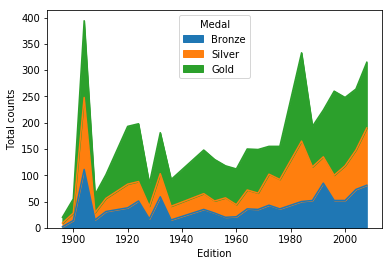

In [56]:
# Redefine 'Medal' as an ordered categorical
medals.Medal = pd.Categorical(values = medals.Medal, categories=['Bronze', 'Silver', 'Gold'], ordered=True)

# Create the DataFrame: usa
usa = medals[medals.NOC == 'USA']

# Group usa by 'Edition', 'Medal', and 'Athlete'
usa_medals_by_year = usa.groupby(['Edition', 'Medal'])['Athlete'].count()

# Reshape usa_medals_by_year by unstacking
usa_medals_by_year = usa_medals_by_year.unstack(level='Medal')

# Create an area plot of usa_medals_by_year
usa_medals_by_year.plot.area()
plt.ylabel('Total counts')

This area plot correlates well with the line plot above.